In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

In [2]:
optdigits_df=pd.read_csv('optdigits_csv.csv')

## To perform kmeans algorithm one has to follow these steps:
1. Decide the number of cluster in our case there are 10 digits to be classified so 10 clusters.
2. Initialize the centroid
3. Assign to each point in the dataset a centroid, respective centroid are assigned to each point by calculating the shortest distance between centroid and point.
4. Calculate the new centroid by calculating mean of all points assigned to the centroid.
5. Repeat the algorithm till value in centroid doesnt change

In [3]:
def test_train_splitter(optdigits_df):
    train,test = train_test_split(optdigits_df,test_size=0.20, random_state=1)
    division = train.shape[1] - 1
    train_without_label = train.iloc[:,0:division].values 
    train_with_label = train.iloc[:,:].values
    test_data = test.iloc[:,0:division].values  
    test_label = test.iloc[:,division].values 
    return train_with_label,train_without_label,test_data,test_label

## Centroid initialization
In this step centroids are initialized.    
It is ensured that centroids are initialized from each digit. 

In [4]:
def centroid_initialization(train_with_label,train_without_label):    
    i = 0
    Centroids=np.array([]).reshape(no_of_features,0)
    while(i<10):
        rand=rd.randint(0,m-1)
        # A point is guessed and label is correlated with i whose value varies from 0 - 10
        # If value of label is mached with i it is added in centroids
        # i is incremented
        # This step help us ensure that in cluster 0 centroid with feature whose label is 0 is assigned
        # This helps us as cluster zero most probably will point to digit 0
        if(train_with_label[rand,no_of_features] == i):
            Centroids=np.c_[Centroids,train_without_label[rand]]
            i = i + 1
    return Centroids

## K-Means Algorithm
From centroid EuclidianDistance is calculated with each Point and a cluster is assigned to a point based on the shortest distance with the cluster.  
Mean is calculated from each point in a respective centroid and is used as a new centroid.   

In [5]:
def kmeans_algorithm(train_with_label,train_without_label,Centroids):
    # Where train_without_label is the training dataset with contains only feature and train_without_label is the training dataset with feature as well as labels
    num_iter=100
    Output={} #output that will store each point in a cluster
    for n in range(100):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((train_without_label-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1) # cluster for each point based on shortest distance from a centroid 
        #Calculating new mean
        Z={}
        for k in range(K):
            Z[k]=np.array([]).reshape(no_of_features,0)
            Output[k]=np.array([]).reshape(no_of_features+1,0)
        for i in range(m):
            Z[C[i]]=np.c_[Z[C[i]],train_without_label[i]]
            Output[C[i]]=np.c_[Output[C[i]],train_with_label[i]]     
        for k in range(K):
            Z[k]=Z[k].T
        for k in range(K):
            Centroids[:,k]=np.mean(Z[k],axis=0)
        return Output
        #because we are returing in output feature with label thats why we had to do a unconventional test and train split 

### Showing all digits present in a cluster based on their labels

In [6]:
def print_number_in_all_cluster(Output):
    for i  in range(0,10):
        print("cluster "+str(i))
        print("Number of elements in a cluster: " + str(Output[i].shape[1]))
        print(Output[i][no_of_features,:])

### visualizing points based on their features

In [7]:
def visualize_50_digits_in_cluster(Output):
    for j in range(0,10):
        plt.figure(figsize=(30,10))
        print('Cluster ' + str(j))
        numOfRows = 50
        print(str(Output[j].shape[1]) + " elements")
        for i in range(0,50):
            plt.subplot(5+1,10,i+1)
            image = Output[j][0:no_of_features,i]
            image = image.reshape(8,8)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
        plt.show()

## Measuring Accuracy
The accuracy is Measured by calculating which cluster the data belongs and assigning the value of the respective cluster.  
Comparing how many are correctly identified and dividing with number of test data.

In [8]:
def measuring_accuracy(Centroids,test_data,test_label):
    #using the centroids calculated from training data we calculate the least distance using eucladian norm 
    # the point whose distance is least to a centroid the point is assigned to that centroid
    number_of_test_data = test_data.shape[0]
    EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
    for k in range(K):
        tempDist=np.sum((test_data-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    predicted_value=np.argmin(EuclidianDistance,axis=1) #tells to which cluster data point is assigned
    number_of_correct_prediction = 0
    for i in range(0,predicted_value.shape[0]):
        if(predicted_value[i] == test_label[i]): #comapring the cluster value to actual label we find number of correct prediction
            number_of_correct_prediction = number_of_correct_prediction + 1
    accuracy = number_of_correct_prediction/number_of_test_data * 100
    print('Accurcy in test Dataset:')
    print(accuracy)

In [9]:
train_with_label,train_without_label,test_data,test_label = test_train_splitter(optdigits_df)
m = train_without_label.shape[0] #number of points in training dataset
no_of_features = train_without_label.shape[1] #number of features
K=10 #number of centroid
Centroids = centroid_initialization(train_with_label,train_without_label)
Output = kmeans_algorithm(train_with_label,train_without_label,Centroids)

Cluster 0
471 elements


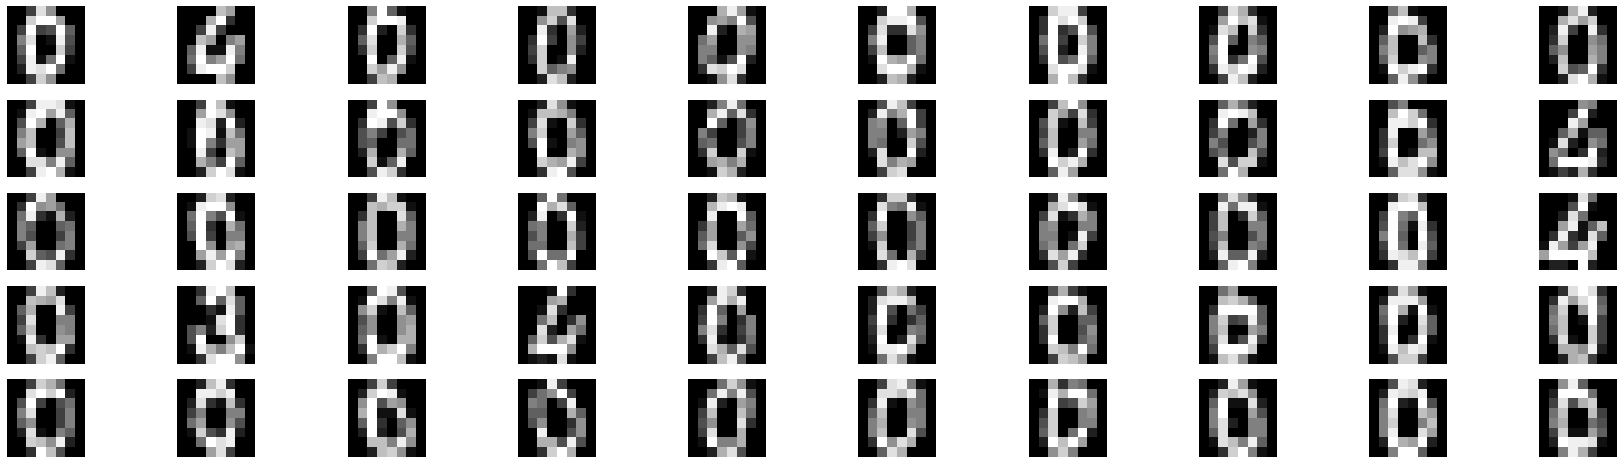

Cluster 1
468 elements


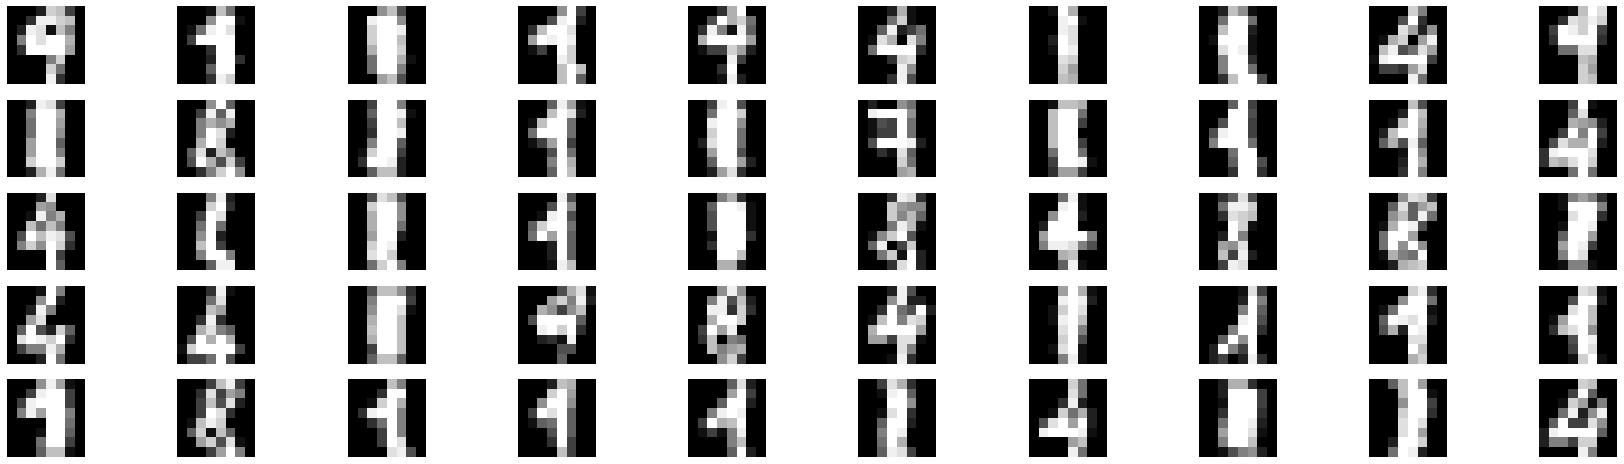

Cluster 2
763 elements


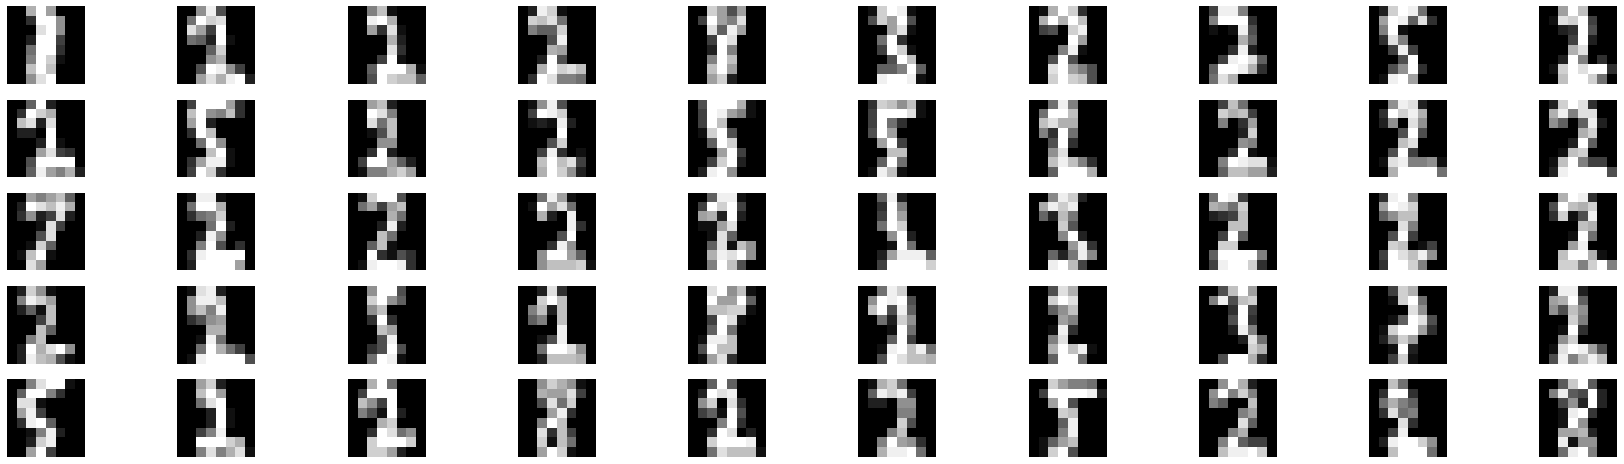

Cluster 3
512 elements


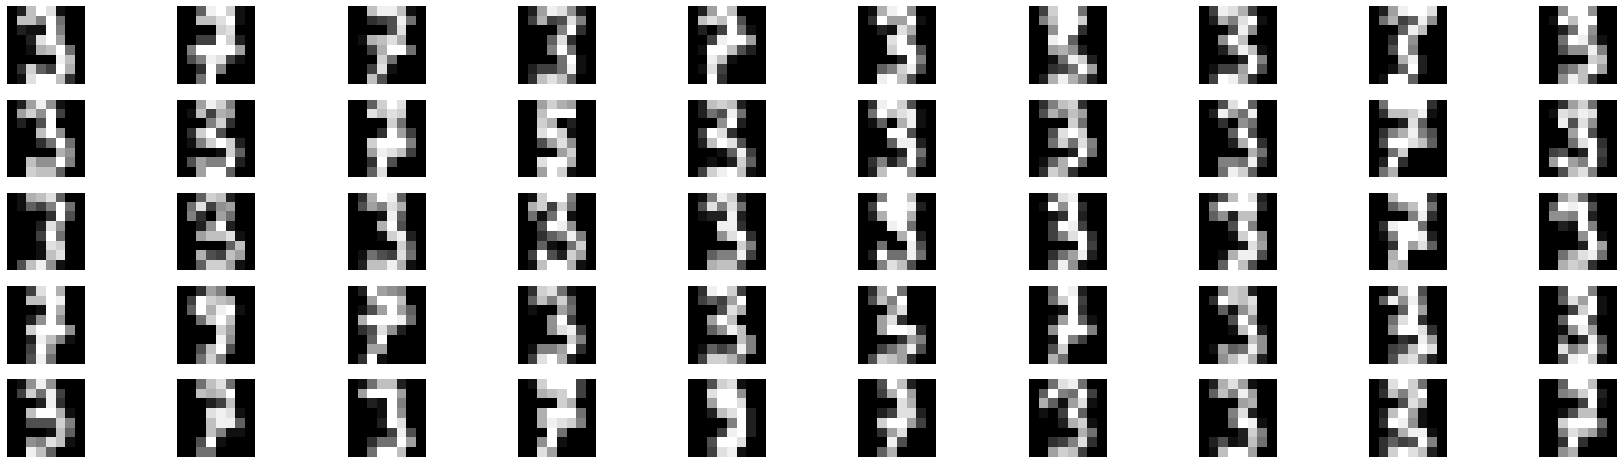

Cluster 4
385 elements


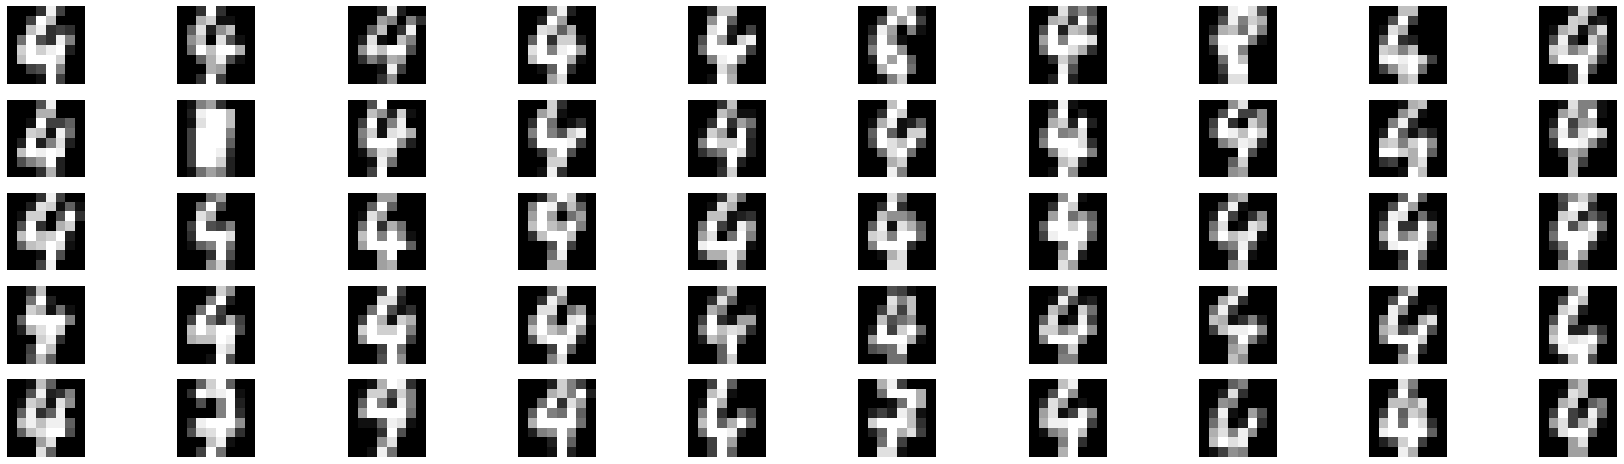

Cluster 5
665 elements


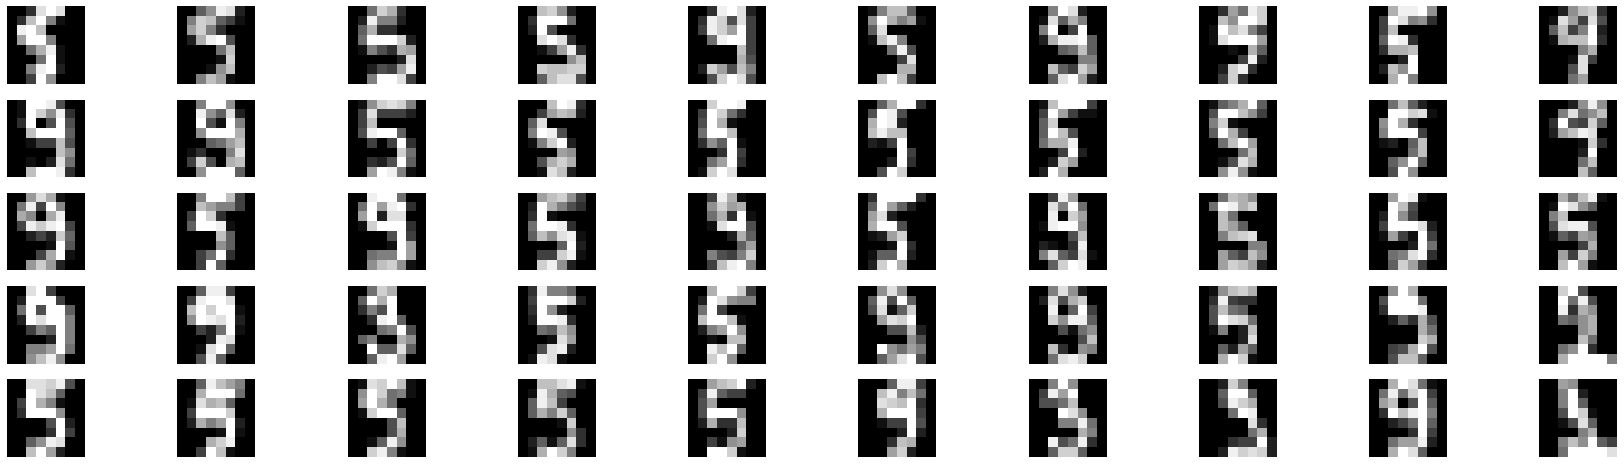

Cluster 6
478 elements


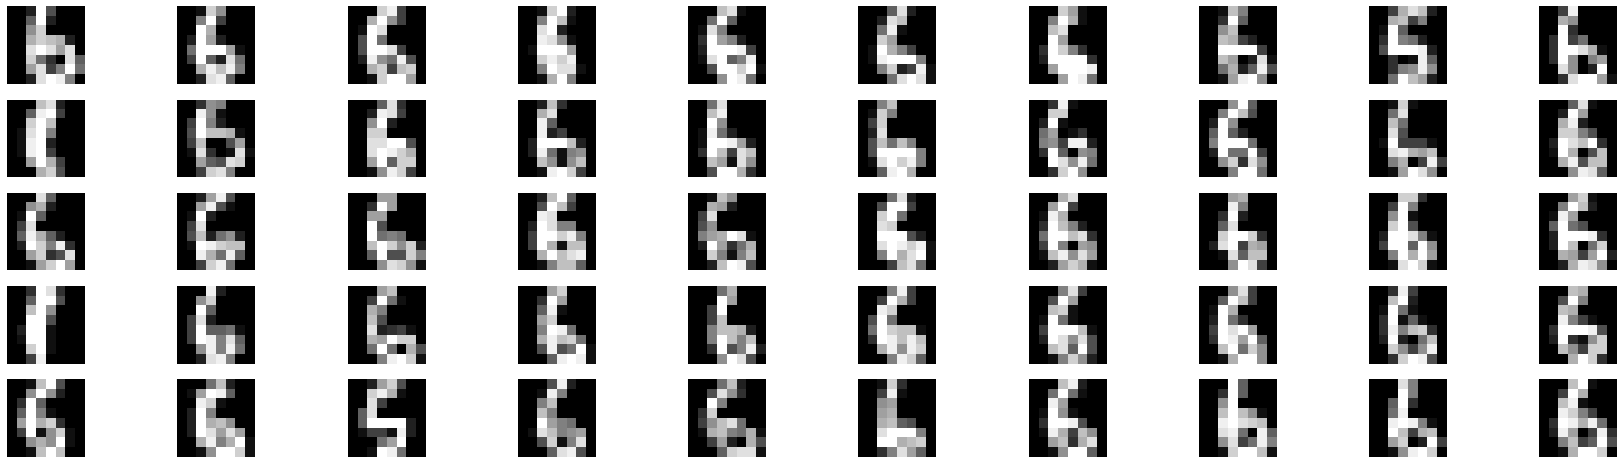

Cluster 7
278 elements


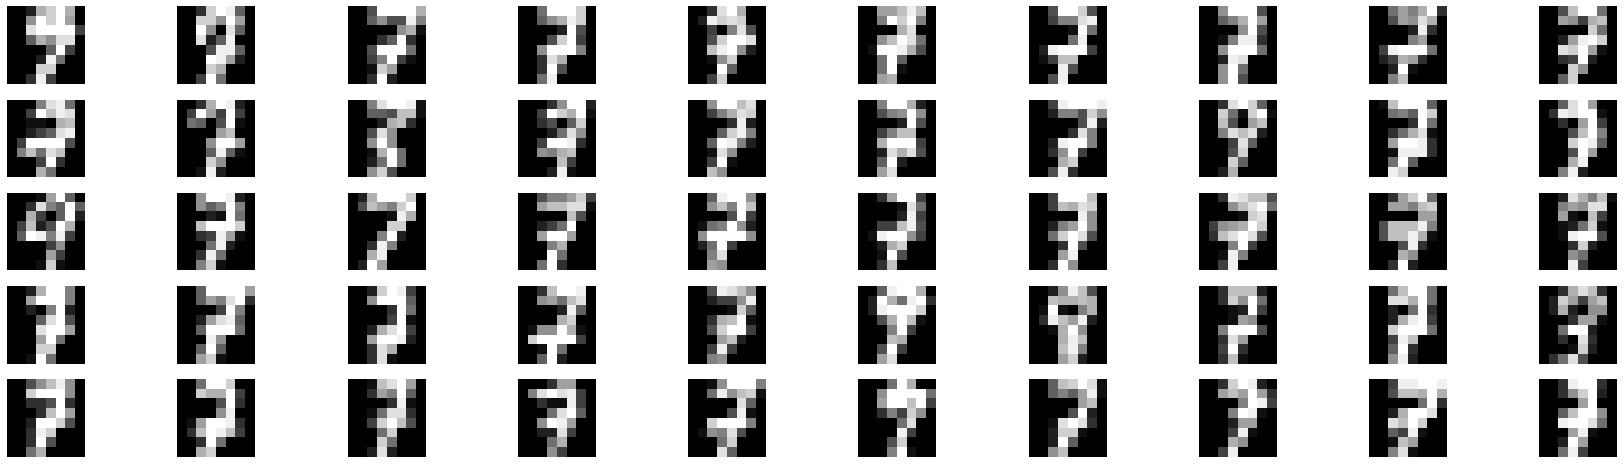

Cluster 8
372 elements


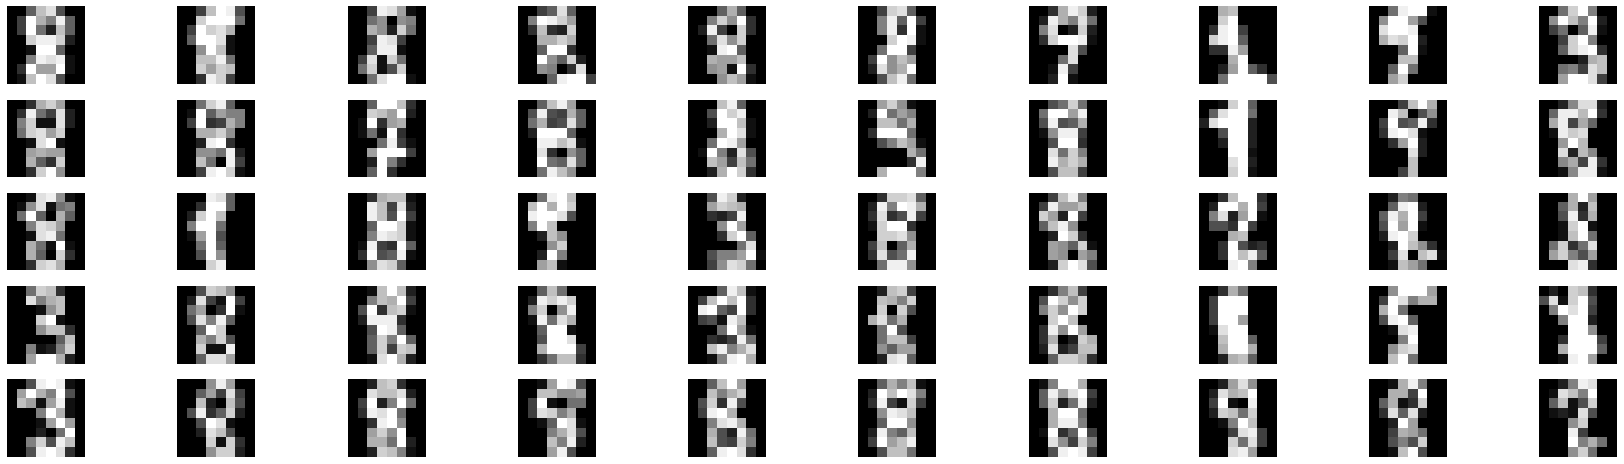

Cluster 9
104 elements


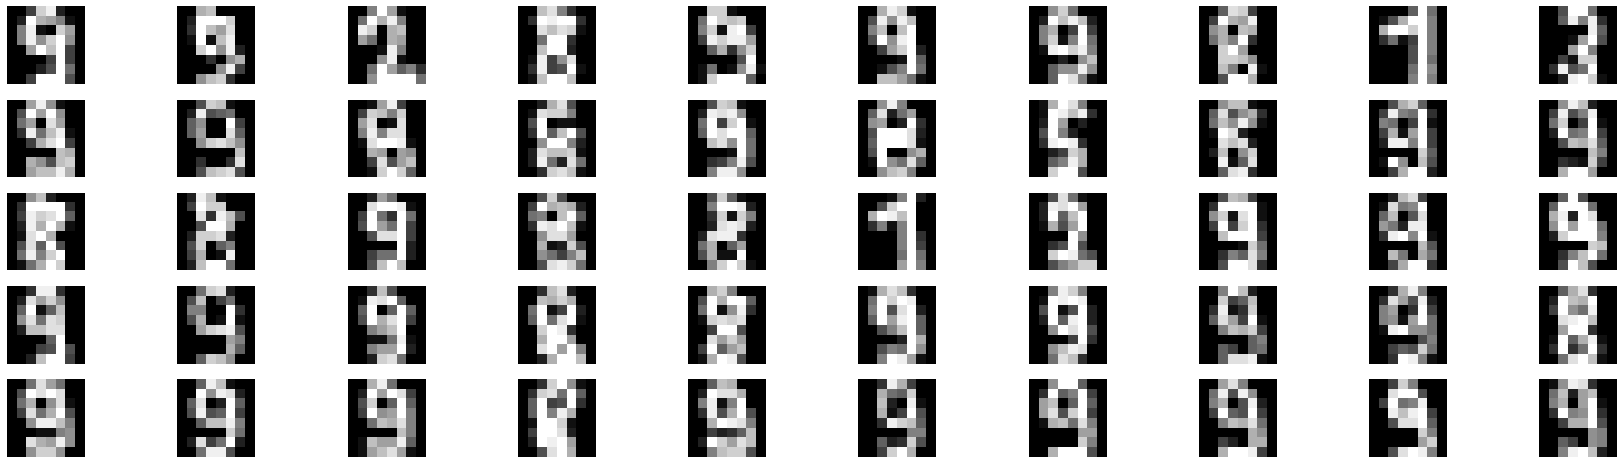

In [10]:
visualize_50_digits_in_cluster(Output)

We Have just visualized 50 points from our dataset that belongs to a respective label.

In [11]:
print_number_in_all_cluster(Output)

cluster 0
Number of elements in a cluster: 471
[0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 4. 0. 3. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0.
 0. 0. 9. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

This here shows you all the points that have clusttered together better than the visualization method used earlier.      
As you can observe in a cluster has many digits, but each cluster has a digit that occurs in majority.      
Our centroid initialization ensured that the cluster 0 corresponds to digit 0 and so on.       

In [12]:
measuring_accuracy(Centroids,test_data,test_label)

Accurcy in test Dataset:
77.31316725978647


Accuracy is just a metric that tell us that how our algorithm with corresponding centroids classify the digits and them compared with there label , and tell us how it performs on the test dataset.

## Conclusion
What we conclude is that kmeans depends heavily on the centroid initialization.  
If centroid as initialized in between of corresponding cluster of data we can get higher accuracy from our algorithm